## Introduction


Regression model shows the relationship between y (output) and the x (input) variables of the dataset. Considering real life datasets, we have to assume that some of those variables are correlated in the sense they can substitute each other.  As a consequence of this relationship of two or more variables in the dataset, the notion of multicollinearity is presented. The presence of multicollinearity inflates the variance and covariance of affected variables, such that they become statistically insignificant and impacts the results of the training dataset in a misleading way. Using more than one of these explanatory variables in a single regression model would lead to redundancy and inconsistency in the model. Each explanatory variable in the regression model must achieve a different aspect of the dependent variable that needs to be predicted.

In our analysis we are using “auto-mpg” dataset to investigate it on the presence of multicollinearity and to implement several methods in order to decrease it. Our analysis has been performed using “numpy”, “pandas”, “seaborn”, “matplotlib”, “sklearn” data manipulating, visualising libraries, as well as statistical “statsmodels” package. Before starting any data manipulation, it is important to check on possible missing values of any value of the variable in the dataset. 

## Content:
- [Part 1](#part1)- Importing the libraries, packages
- [Part 2](#part2)- Creating Linear Regression with the presence of Multicollinearity
- [Part 3](#part3) -  Identifying the presence of multicollinearity 
- [Part 4](#part4) -  Applying PCA on the dataset 
- [Part 5](#part5) -  Checking the results of PCA implementation
- [Part 6](#part6) -  Importing "auto-mpg" dataset
- [Part 7](#part7) -  Preparation of the datset
- [Part 8](#part8) -  Identifying the presence of multicollinearity (visualisations, OLS table, VIF)
- [Part 9](#part9) -  Implementation of the substracting the mean method 
- [Part 10](#part10) -  Implementation of the PCA model
- [Part 11](#part11) -  Results and Conclusion

[Back to top](#Content:)


<a id='part1'></a>

### Part 1 -   Importing the libraries, packages

In [1]:
#Importing packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from numpy.random import default_rng
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

[Back to top](#Content:)


<a id='part2'></a>

### Part 2 -   Creating Linear Regression with the presence of Multicollinearity

In [2]:
# Class to generate 2D data points
## Generate data points
rng = default_rng()
class Data2D:
    
    def __init__(self, slope = (1, 1), noise_variance = 1 ):
        
        # intialize member variables here 
        self.slope = slope
        self.noise_variance = noise_variance
        
        
        
    def generate_points(self, N = 50):
    
        slope = self.slope
        noise_variance = self.noise_variance

        # initialize noise epsilon 
        epsilon = rng.normal(0, noise_variance**(1/2), N)

        ## Generate N points
        X_1 = 30*(np.random.random(N)-0.5)
        #creating multicollinearity
        X_2=X_1**2

        # We create a design matrix, where rows are datapoints and columns are features, or input dimensions
        X = np.vstack( [X_1, X_2]).transpose()

        # initialize **y** with the equation of line here. Equation of line is written in the desciption above, 
        # line parameters (a,b, c) are stored in a local variable

        y = X.dot(np.array(slope)) + epsilon

        return X, y


In [3]:
## function to generate 2D data points 
def generate_data(slope = (1,1), noise_variance=1, N = 50):
    
    # initialize noise epsilon 
    epsilon = rng.normal(0, noise_variance**(1/2), N)
    
    ## Generate N points
    # for X_1 generate random points between -15,15
    X_1 = 30*(np.random.random(N)-0.5)
    #creating multicollinearity
    X_2=X_1**2
    
    # We create a design matrix, where rows are datapoints and columns are features, or input dimensions
    X = np.vstack( [X_1, X_2]).transpose()
    
    # initialize **y** with the equation of line here. Equation of line is written in the desciption above, 
    # line parameters (a,b, c) are stored in a local variable

    y = X.dot(np.array(slope)) + epsilon
    
    return X, y

In [4]:
## Regression function returns slope, intercept, reg score
def regression(X, y) :
    reg = LinearRegression().fit(X.reshape(-1,1), y)
    
    return reg.coef_[0], reg.intercept_, reg.score(X, y)

Regression slope : 1.998 Regression intercept : 0.041 Regression score : 0.996


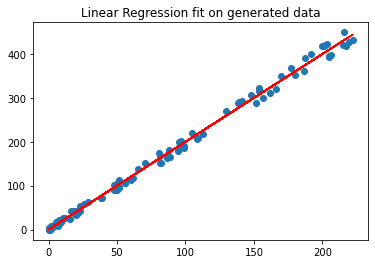

In [5]:
## Generating data plotting the regression line
s = (-1,2)
X, y = generate_data(s, 4, 100)
a, b, c = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
plt.plot(X[:,1],a*X[:,1]+b, c='red')
plt.scatter(X[:,1],y)
plt.title('Linear Regression fit on generated data')
plt.show();

[Back to top](#Content:)


<a id='part3'></a>

### Part 3 - Identifying the presence of multicollinearity

In [6]:
#Using statistical analysis to find whether there is a high correlation that can impact our output 
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.369e+05
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          1.23e-179
Time:                        20:19:07   Log-Likelihood:                -213.75
No. Observations:                 100   AIC:                             433.5
Df Residuals:                      97   BIC:                             441.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3643      0.321      1.136      0.2

OLS Regression statistical analysis table, showed high condition number (8.59e+04), indicating the strong multicollinearity problem.


We will use the PCA model and see how it will impact multicollinearity in our linear regression.

[Back to top](#Content:)


<a id='part4'></a>

### Part 4 - Applying PCA on the dataset

In [7]:
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)
#Plotting the Cumulative Summation of the Explained Variance
np.cumsum(pca.explained_variance_ratio_)

array([0.50863446, 1.        ])

In [8]:
#we will be using n_components=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_pca_with_constant = sm.add_constant(X_pca)

[Back to top](#Content:)


<a id='part5'></a>

### Part 5 - Checking the results of PCA implementation

In [9]:
#checking for multicollinearity after PCA
model = sm.OLS(y, X_pca_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.369e+05
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          1.23e-179
Time:                        20:19:07   Log-Likelihood:                -213.75
No. Observations:                 100   AIC:                             433.5
Df Residuals:                      97   BIC:                             441.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.4671      0.208    803.985      0.0

 [Back to top](#Content:)


<a id='part6'></a>

### Part 6 - Importing "auto-mpg" dataset

Let's apply this knowledge on the "auto-mpg" dataset.

In [10]:
#opening the dataset to work with "auto-mpg"
path = '.'
dataset = os.path.join("auto-mpg.csv")
df = pd.read_csv(dataset,na_values=['NA','?'])
# df.head(10)

Before starting any data manipulation, it is important to check on possible missing values of any value of the variable in the dataset. 

 [Back to top](#Content:)


<a id='part7'></a>

### Part 7 - Preparation of the dataset

In [11]:
#checking for missing values
df.isnull().values.any()

True

In [12]:
#Checking number of NANs for each column, in order to understand how many missing values there are in a dataframe.
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [13]:
#let's fill missing values of "Horsepower" with its median of the column
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)

In [14]:
#Checking for missing values the column "Horsepower" after filling it with medians value of the column
df["horsepower"].isnull().values.any()

False

 [Back to top](#Content:)


<a id='part8'></a>

### Part 8 - Identifying the presence of multicollinearity (visualisations, OLS table, VIF)

Exploring correlation between columns of our dataset using different methods and possible multicollinearity.


We can see that there is a high correlation between these three columns.


As x varibale increases, y outcome variable increases in a almost perfectly correlated manner.

We can also have a look at correlation between all comulmns at our datset 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


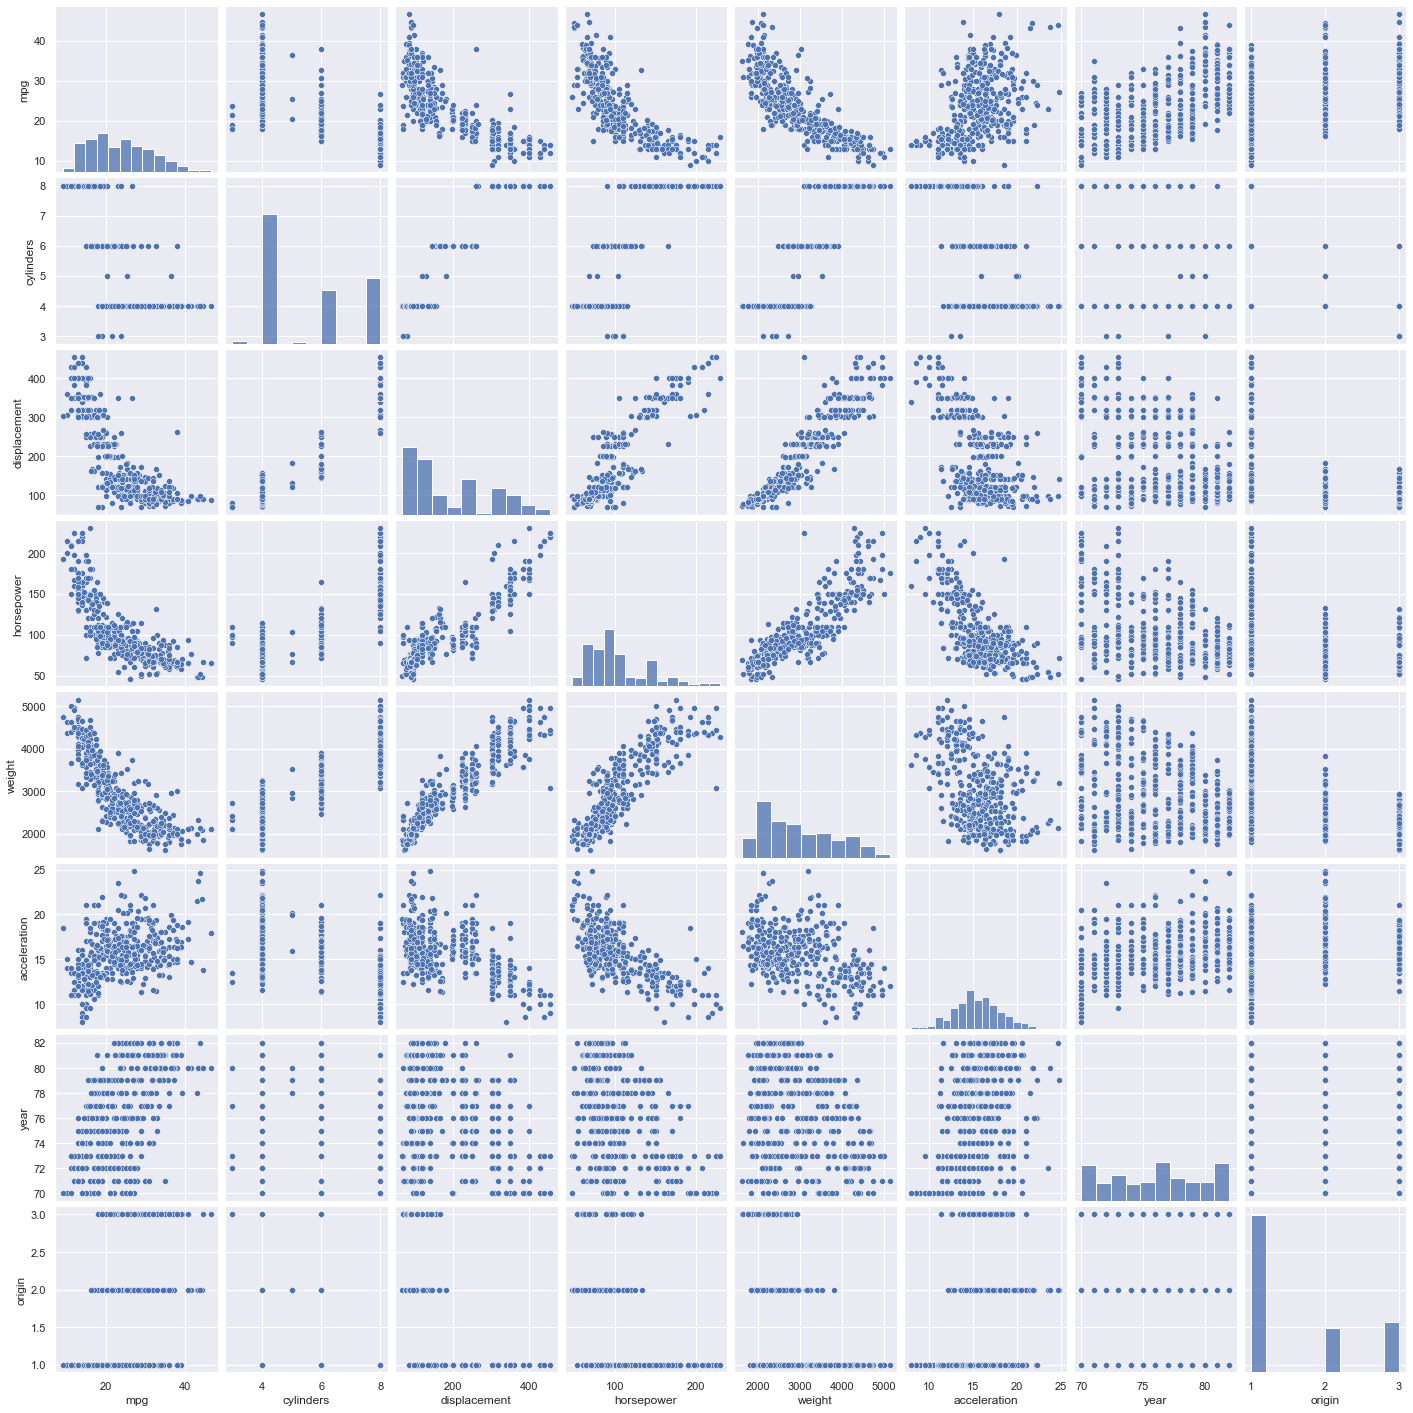

In [15]:
#scatterplot
sns.set()
cols = df.columns.drop(["name"])
sns.pairplot(df[cols], size = 2.5)
plt.show();

Or heatmaps

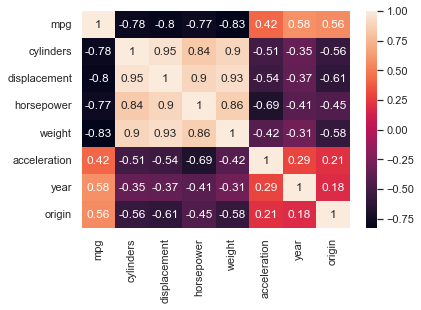

In [16]:
# Heatmap 
columns = df.columns
hm = sns.heatmap(df[columns].corr(), cbar=True, annot=True)

In [ ]:
X

In [30]:
#Using statistical analysis to find whether there is a high correlation that can impact our output 
X = df.drop(columns=["name", "mpg"])
y = df["mpg"]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2969.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                        0.00
Time:                        13:05:13   Log-Likelihood:                         -1047.9
No. Observations:                 398   AIC:                                      2110.
Df Residuals:                     391   BIC:                                      2138.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In our analysis we have used pairplots and heatmaps using matplolib and seaborn libraires. They have showed the presence of high correlation between “displacement”, “horsepower”, “weight” and “cylinders” values. We also called the OLS Regression statistical analysis table, which showed high condition number (8.59e+04), indicating the strong multicollinearity problem. 

Variance Inflation Factor (VIF) is another tool of the data analysis that demonstrates how one input variable impacts the other. VIF higher than 10 is usually undesirable, since it highlights unreliability of computations in regression analysis and considered to be problematic. It is computed using the R-squared from the regression: VIF = 1/(1-R**2 in k). Our results showed extremely high VIF, confirming again high multicollinearity.

In [18]:
X_VIF = df.drop(columns=["name"])
data = pd.DataFrame()
data["feature"] = X_VIF.columns
data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(data)

        feature         VIF
0           mpg   54.161450
1     cylinders  118.089792
2  displacement   98.842261
3    horsepower   66.093559
4        weight  169.747304
5  acceleration   68.313761
6          year  288.794481
7        origin    8.811311


 [Back to top](#Content:)


<a id='part9'></a>

### Part 9 - Implementation of the substracting the mean method

In order to solve this issue, several options are considered: leaving the dataset as it still predicts the output; removing, but this can create omitted variable bias, since there will be variables outside of the model; combining multicollinear variables to create new ones; and using PCA (Principal Component Analysis). We have demonstrated the impact on multicollinearity of PCA and the method of subtracting the mean.

In [19]:
#Substracting the mean on a copy of our dataset
new_df = df.copy()
m_mean = new_df.mean() # mean value 
print (m_mean)
result =  new_df -new_df.mean()#after substraction
print (result)

mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.304020
weight          2970.424623
acceleration      15.568090
year              76.010050
origin             1.572864
dtype: float64
     acceleration  cylinders  displacement  horsepower        mpg name  \
0        -3.56809   2.545226    113.574121    25.69598  -5.514573  NaN   
1        -4.06809   2.545226    156.574121    60.69598  -8.514573  NaN   
2        -4.56809   2.545226    124.574121    45.69598  -5.514573  NaN   
3        -3.56809   2.545226    110.574121    45.69598  -7.514573  NaN   
4        -5.06809   2.545226    108.574121    35.69598  -6.514573  NaN   
..            ...        ...           ...         ...        ...  ...   
393       0.03191  -1.454774    -53.425879   -18.30402   3.485427  NaN   
394       9.03191  -1.454774    -96.425879   -52.30402  20.485427  NaN   
395      -3.96809  -1.454774    -58.425879   -20.30402   8.485427  NaN   
396       3.03191  -1

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6364/2446490212.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m_mean = new_df.mean() # mean value
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6364/2446490212.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result =  new_df -new_df.mean()#after substraction


Subtract the mean method, which is also known as centering the variables. This method removes the multicollinearity produced by interaction and higher-order terms as effectively as the other standardization methods, but it has the added benefit of not changing the interpretation of the coefficients. If you subtract the mean, each coefficient continues to estimate the change in the mean response per unit increase in X when all other predictors are held constant.

In [20]:
#Checking VIF again
X_VIF = result.drop(columns=["name"])
data = pd.DataFrame()
data["feature"] = X_VIF.columns
data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(data)


        feature        VIF
0  acceleration   2.560398
1     cylinders  10.743575
2  displacement  22.253915
3    horsepower   9.471813
4           mpg   5.584930
5        origin   1.864784
6        weight  13.542601
7          year   1.957598


 [Back to top](#Content:)


<a id='part10'></a>

### Part 10 - Implementation of the PCA model

In our case subtracting the mean method still left some of the variables with high VIF, so we also implemented the PCA model with 3 n-components. 

PCA model works with multicollinearity. Let's see how it will work on our dataset.

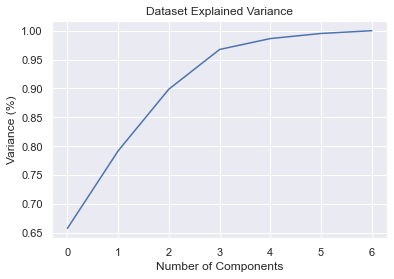

In [32]:
#Choosing the number of components
X = df.drop(columns=["name","mpg"])
y = df["mpg"]
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [33]:
np.cumsum(pca.explained_variance_ratio_)

array([0.6574515 , 0.79177475, 0.89872935, 0.96746963, 0.98636342,
       0.99520035, 1.        ])

we can see that after the second variable, variance is increasing. That is what we need.So, n_components=3 will used for our PCA model.

In [34]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)
X_pca_with_constant = sm.add_constant(X_pca)

In [35]:
print(X_pca_with_constant)

[[ 1.          2.66750421  0.96425349  0.55677981]
 [ 1.          3.40670628  1.09310989  0.28622597]
 [ 1.          3.018035    1.2201377   0.2621812 ]
 ...
 [ 1.         -0.91474051 -0.45791371 -1.6169074 ]
 [ 1.         -1.62548035 -1.77676752 -0.19395555]
 [ 1.         -1.63338608 -1.92876032 -0.04771029]]


Let's check again our statistical table

In [36]:
model = sm.OLS(y, X_pca_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     481.6
Date:                Mon, 29 Nov 2021   Prob (F-statistic):          2.24e-131
Time:                        14:47:50   Log-Likelihood:                -1076.0
No. Observations:                 398   AIC:                             2160.
Df Residuals:                     394   BIC:                             2176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5146      0.182    129.169      0.0

 [Back to top](#Content:)


<a id='part11'></a>

### Part 11 - Results and Conclusion

Now we have checked again our statistic analysis on the database, we can see that there is no warning about the multiculliniarity

Comparing the MSE train and R**2 for initial dataset with the dataset using the PCA.

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()

In [27]:
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_with_constant, y, test_size=0.3, random_state=0)
slr = LinearRegression()

In [29]:
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 110.186, test: 121.727
R^2 train: 0.919, test: 0.928


We observe that, as a result of our manipulations, MSE train and R**2 are smaller.

Conlcusion. 
We have studied multicollinearity and its impact on the prediction of the datase, demonstrated its presence by ploting visualisation tables and heatmaps.
We have learned how implementation of the PCA and substraction of the mean models decrease it. 